In [1]:
import contextily as ctx
import data_loader
import math
import utility

from pathlib import Path
from geopandas import GeoDataFrame
import geopandas

In [2]:
data_frame = data_loader.load_gomap_test_detections()

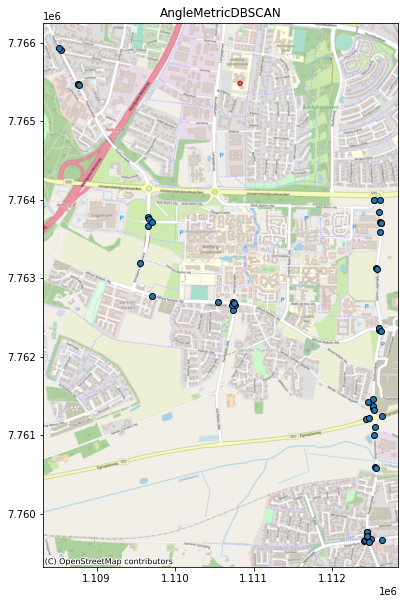

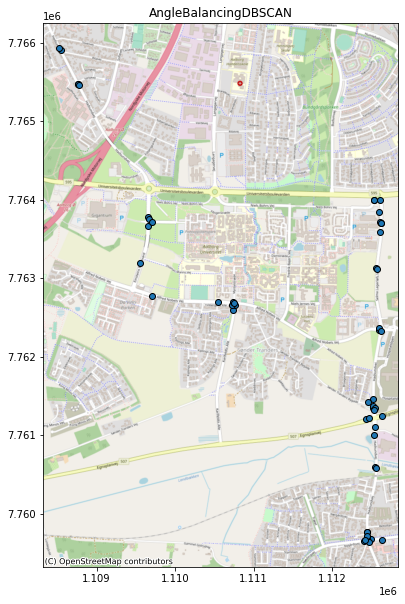

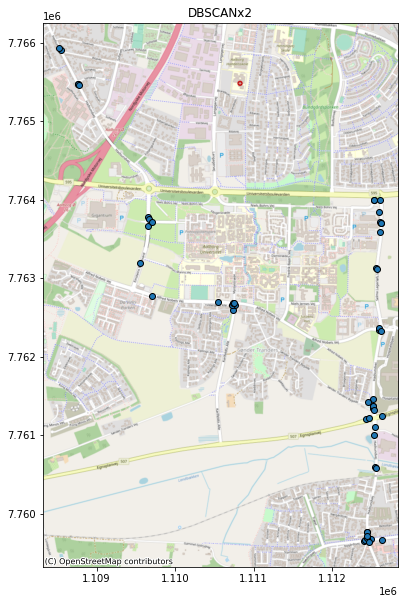

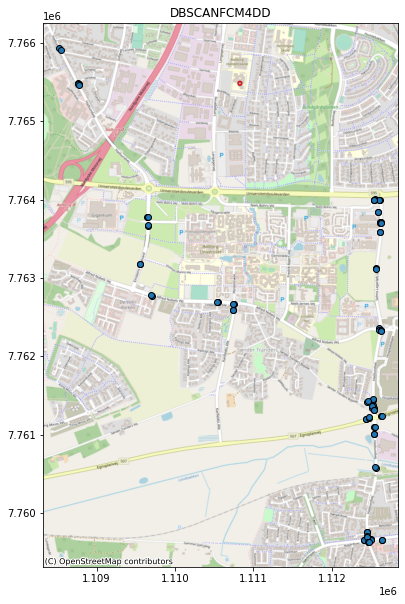

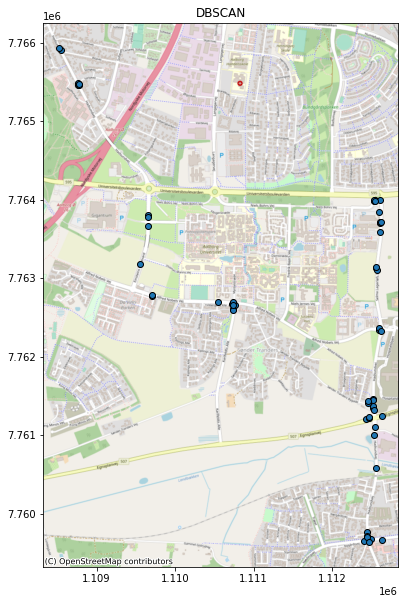

In [3]:
result = GeoDataFrame()

for approach in utility.get_approaches():
    predictions = utility.get_predictions(data_frame, approach, utility.compute_cluster_centroid)
    approach_name = type(approach).__name__
    predictions['approach'] = approach_name
    geo_df = GeoDataFrame(predictions, crs='epsg:3044', geometry='geom')
    result = geo_df.append(result)
    ax = geo_df.to_crs(epsg=3857).plot(figsize=(10, 10), edgecolor='k')
    ax.set_title(approach_name)
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)


In [4]:
output = Path() / 'output' / 'predictions.geojson'
result.to_file(output, driver='GeoJSON')
